In [2]:
import pandas as pd

# Load the dataset from the uploaded file
file_path = '/content/sample_data/dataset for assignment 2.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  5000 non-null   int64 
 1   Gender                   5000 non-null   object
 2   Age                      5000 non-null   int64 
 3   Activity Level           5000 non-null   object
 4   Location                 5000 non-null   object
 5   App Sessions             5000 non-null   int64 
 6   Distance Travelled (km)  5000 non-null   int64 
 7   Calories Burned          5000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 312.6+ KB


(None,
    User ID  Gender  Age Activity Level  Location  App Sessions  \
 0        1  Female   22         Active  Suburban           151   
 1        2    Male   50         Active     Rural           157   
 2        3    Male   36         Active     Urban           178   
 3        4  Female   36         Active  Suburban           155   
 4        5    Male   34      Sedentary     Rural            95   
 
    Distance Travelled (km)  Calories Burned  
 0                      140              728  
 1                      115              523  
 2                      163              795  
 3                       85              715  
 4                       71              439  )

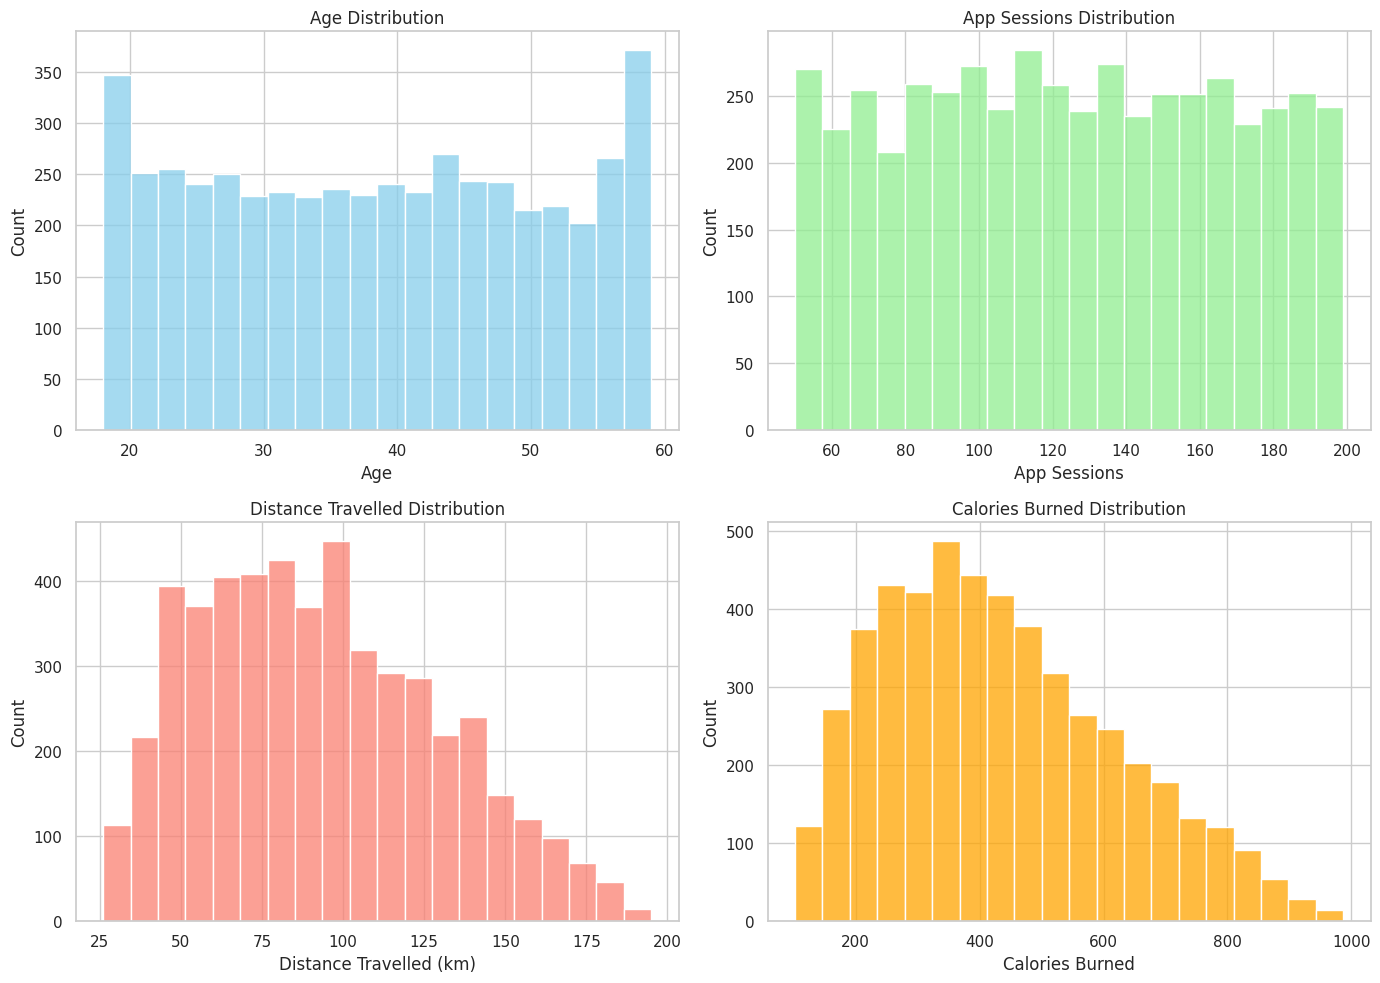

,User ID,Age,App Sessions,Distance Travelled (km),Calories Burned
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,38.423600,124.366400,92.550400,432.316000
std,1443.520003,12.160631,42.689317,36.746095,187.427426
min,1.000000,18.000000,50.000000,26.000000,102.000000
25%,1250.750000,28.000000,89.000000,63.000000,285.000000
50%,2500.500000,39.000000,124.000000,89.000000,406.000000
75%,3750.250000,49.000000,161.000000,118.000000,560.000000
max,5000.000000,59.000000,199.000000,195.000000,987.000000


In [4]:
  import matplotlib.pyplot as plt
	import seaborn as sns
	import pandas as pd

	data = pd.read_csv('/content/sample_data/dataset for assignment 2.csv')

	# Set the aesthetic style for the plots
	sns.set(style="whitegrid")

	# Descriptive statistics summary
	data_description = data.describe()

	# Plotting histograms for numerical features
	fig, axs = plt.subplots(2, 2, figsize=(14, 10))
	sns.histplot(data['Age'], bins=20, ax=axs[0, 0], color='skyblue').set(title='Age Distribution')
	sns.histplot(data['App Sessions'], bins=20, ax=axs[0, 1], color='lightgreen').set(title='App Sessions Distribution')
	sns.histplot(data['Distance Travelled (km)'], bins=20, ax=axs[1, 0], color='salmon').set(title='Distance Travelled Distribution')
	sns.histplot(data['Calories Burned'], bins=20, ax=axs[1, 1], color='orange').set(title='Calories Burned Distribution')

	plt.tight_layout()
	plt.show()

	data_description


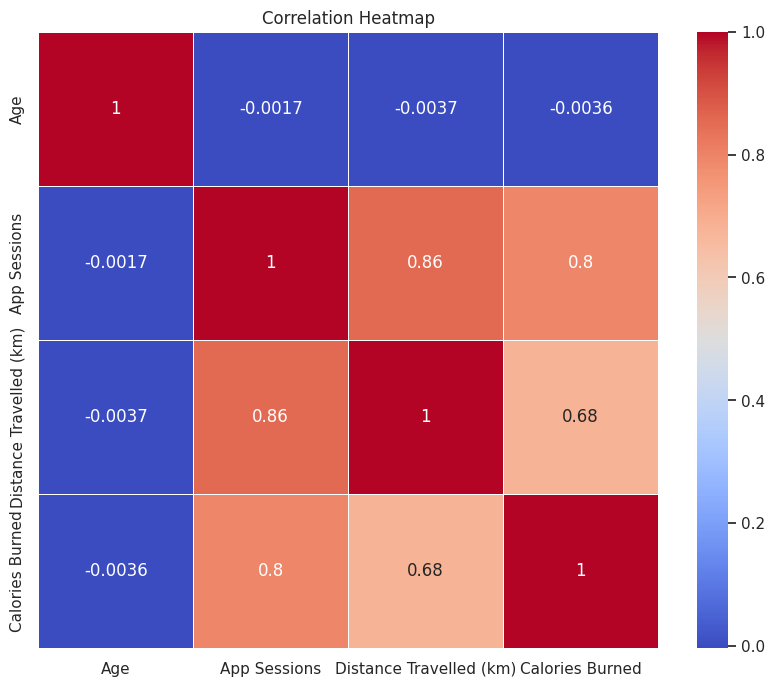

In [5]:
	import matplotlib.pyplot as plt
	import seaborn as sns
	import pandas as pd
	data = pd.read_csv('/content/sample_data/dataset for assignment 2.csv')
	# Correlation heatmap for numerical features
	plt.figure(figsize=(10, 8))
	corr = data[['Age', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned']].corr()
	sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
	plt.title('Correlation Heatmap')
	plt.show()

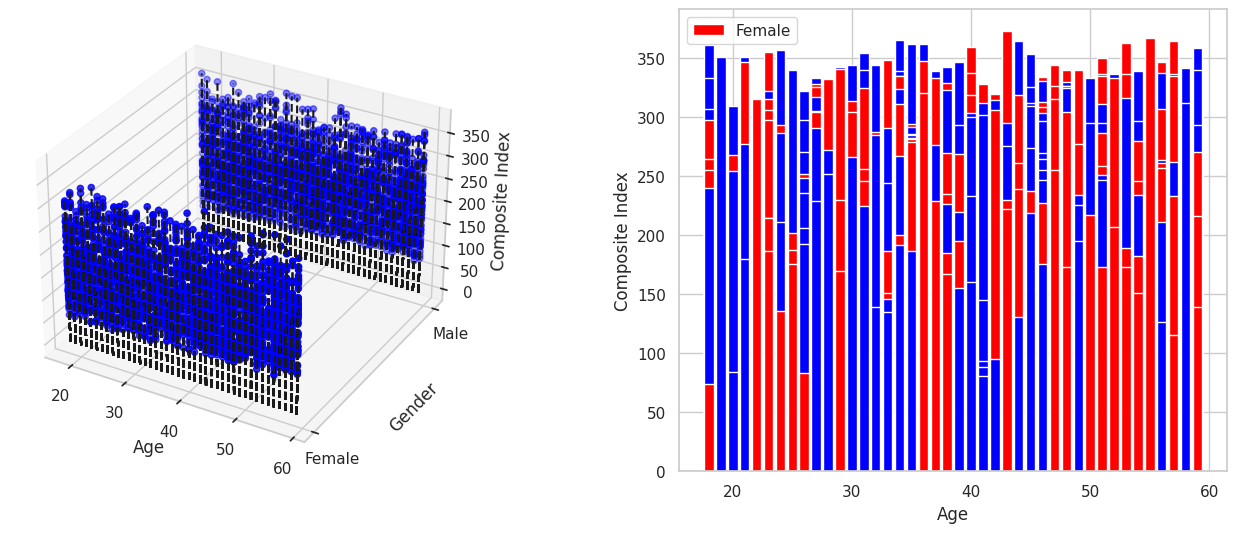

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read the data
data = pd.read_csv('/content/sample_data/dataset for assignment 2.csv')

# Convert categorical variable to numeric for plotting
data['Gender_Numeric'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Define the composite index (assuming a simple weighted average)
data['Composite_Index'] = (data['Age'] * 0.4) + (data['App Sessions'] * 0.3) + (data['Calories Burned'] * 0.3)

# Increase figure size
fig = plt.figure(figsize=(14, 6))

# 3D Scatter Plot
ax = fig.add_subplot(121, projection='3d')
ax.scatter(data['Age'], data['Gender_Numeric'], data['Composite_Index'], color='blue')
ax.set_xlabel('Age')
ax.set_ylabel('Gender')
ax.set_zlabel('Composite Index')
ax.set_yticks([0, 1])
ax.set_yticklabels(['Female', 'Male'])

# Draw dashed lines projecting points to the XY plane
for i in range(len(data)):
  ax.plot([data['Age'][i], data['Age'][i]], [data['Gender_Numeric'][i], data['Gender_Numeric'][i]], [0, data['Composite_Index'][i]], 'k--')

# Bar chart
ax2 = fig.add_subplot(122)
colors = ['blue' if g == 'Male' else 'red' for g in data['Gender']]
ax2.bar(data['Age'], data['Composite_Index'], color=colors)
ax2.set_xlabel('Age')
ax2.set_ylabel('Composite Index')
ax2.legend(['Female', 'Male'])

# Manually adjust the spacing between subplots
plt.subplots_adjust(left=0.05, right=0.95, wspace=0.3)

plt.show()

Mean Absolute Error: 92.83539760265683
R-squared: 0.63


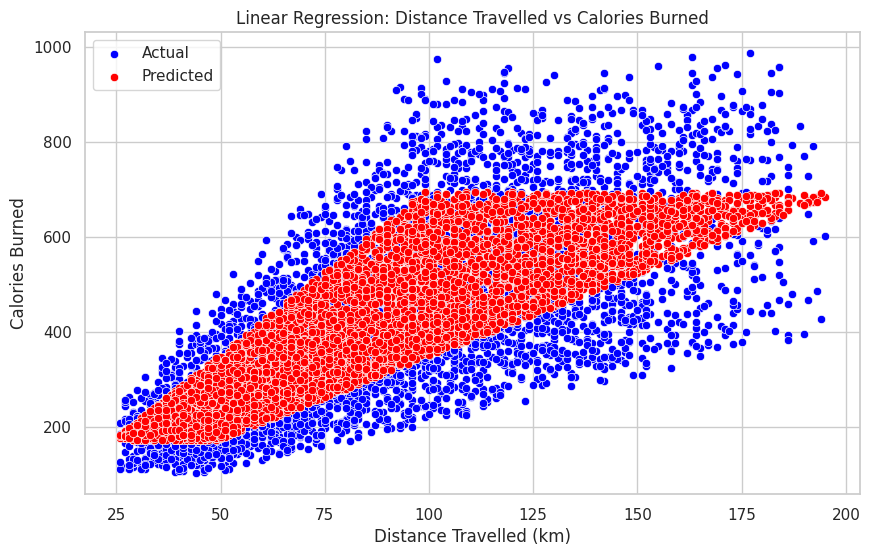

In [8]:
	import pandas as pd
	import numpy as np
	import matplotlib.pyplot as plt
	import seaborn as sns
	from sklearn.linear_model import LinearRegression
	from sklearn.metrics import mean_absolute_error, r2_score

	# Load data
	data = pd.read_csv('/content/sample_data/dataset for assignment 2.csv')

	# Select feature variables and target variable
	X = data[['App Sessions', 'Distance Travelled (km)']]
	y = data['Calories Burned']

	# Create and train linear regression model
	model = LinearRegression()
	model.fit(X, y)

	# Predict calories burned
	y_pred = model.predict(X)

	# Evaluate model
	mae = mean_absolute_error(y, y_pred)
	r2 = r2_score(y, y_pred)

	# Output results
	print(f"Mean Absolute Error: {mae}")
	print(f"R-squared: {r2:.2f}")

	# Visualize results
	plt.figure(figsize=(10, 6))
	sns.scatterplot(x=data['Distance Travelled (km)'], y=data['Calories Burned'], color='blue', label='Actual')
	sns.scatterplot(x=data['Distance Travelled (km)'], y=y_pred, color='red', label='Predicted')
	plt.title('Linear Regression: Distance Travelled vs Calories Burned')
	plt.xlabel('Distance Travelled (km)')
	plt.ylabel('Calories Burned')
	plt.legend()
	plt.show()

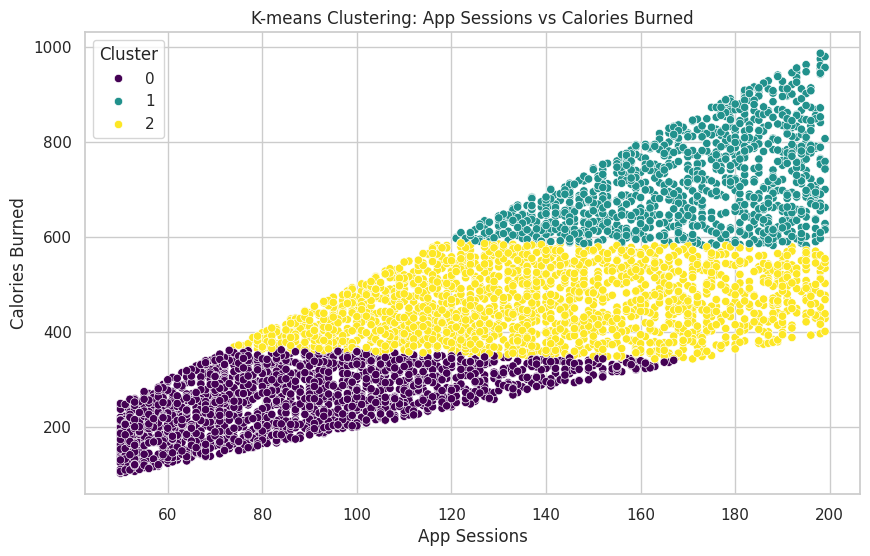

In [9]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('/content/sample_data/dataset for assignment 2.csv')

# Select clustering features
X_cluster = data[['App Sessions', 'Calories Burned']]

# Create and fit K-means model
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_cluster)

# Visualize clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(
x=data['App Sessions'],
y=data['Calories Burned'],
hue=data['Cluster'],
palette='viridis'
)
plt.title('K-means Clustering: App Sessions vs Calories Burned')
plt.xlabel('App Sessions')
plt.ylabel('Calories Burned')
plt.legend(title='Cluster')
plt.show()